# Pandas Tutorial

This tutorial is based on the tutorial given by [Brandon Rhodes at PyCon 2015](https://www.youtube.com/watch?v=5JnMutdy6Fw).

I will also include exercises to help solidfy concepts.



Let's import pandas, numpy, and matplotlib

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
cereal = pd.read_csv('cereal.csv')
cereal.head()                                  #.head() takes a slice of the dataframe, giving us the first 5 observations of a dataframe

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


We will save this slice as a seperate DataFrame.

In [29]:
c = cereal.head()
c

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


DataFrames are made up of columns (in this case our column labels are name, mfr, type, calories, etc.). When you pull out a column, the column is called a "Series". There are two ways we can look up a column. We can use key notation (like dictionaries), or attribute lookup using a period.

In [4]:
c['name']    #key notation

0                    100% Bran
1            100% Natural Bran
2                     All-Bran
3    All-Bran with Extra Fiber
4               Almond Delight
Name: name, dtype: object

In [5]:
print('c is of data type:',type(c))
print('c[\'name\'] is of data type:',type(c['name']))

c is of data type: <class 'pandas.core.frame.DataFrame'>
c['name'] is of data type: <class 'pandas.core.series.Series'>


In [6]:
c.name        #attribute lookup

0                    100% Bran
1            100% Natural Bran
2                     All-Bran
3    All-Bran with Extra Fiber
4               Almond Delight
Name: name, dtype: object

Performing math operations will apply an operation to the whole Series.

In [10]:
c.calories

0     70
1    120
2     70
3     50
4    110
Name: calories, dtype: int64

In [7]:
c.calories * 1000

0     70000
1    120000
2     70000
3     50000
4    110000
Name: calories, dtype: int64

In [8]:
c.calories > 100            #use comparison operators: >, <, >=, <=, ==, !=

0    False
1     True
2    False
3    False
4     True
Name: calories, dtype: bool

#### Exercise:

1. Return a list of booleans (True and Falses) for cereals that have exactly 70 calories

In [30]:
c.calories == 70

0     True
1    False
2     True
3    False
4    False
Name: calories, dtype: bool

### Filtering

How can we use the above operation to get the rows that we want? For example, how can we get rows where calories are greater than 100?

Answer: We can feed a list of booleans (Trues and Falses) to get certain rows we want.

In [10]:
c[[False,True,False,False,True]]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Here is essentially the same code

In [11]:
c[c.calories > 100]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


We can use & and | operators for more complex conditioning.

In [12]:
c[(c.calories >= 70) & (c.calories < 100)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


In [13]:
cereal[cereal.mfr == 'K']

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
21,Crispix,K,C,110,2,0,220,1.0,21.0,3,30,25,3,1.00,1.00,46.895644
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
25,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75,31.435973
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141


#### Exercise:

1. Return all observations for cereals that have exactly 70 calories

In [31]:
c[c.calories == 70]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


In [14]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [15]:
s = cereal.potass - cereal.sodium
s.head()

0    150
1    120
2     60
3    190
4   -201
dtype: int64

In [16]:
s = 1/cereal['cups']
s.head()

0    3.030303
1    1.000000
2    3.030303
3    2.000000
4    1.333333
Name: cups, dtype: float64

In [17]:
s = 1/cereal['cups']*cereal['calories']
s.head()

0    212.121212
1    120.000000
2    212.121212
3    100.000000
4    146.666667
dtype: float64

#### Exercise:

1. Return a Series that tells how much potassium is contained in one cup of each cereal.

In [32]:
s = 1/cereal.cups*cereal.potass
s.head()

0    848.484848
1    135.000000
2    969.696970
3    660.000000
4     -1.333333
dtype: float64

### Sorting

In [18]:
cereal.sort_values('calories').head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


In [19]:
cereal.sort_values(['calories', 'protein']).head() #can sort by multiple values

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


In [20]:
cereal.sort_values(['calories', 'protein'], ascending=[True,False]).head() #can sort by multiple values

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


#### Exercise:

1. Sort (in descending order) the cereal dataset by rating.

In [33]:
cereal.sort_values('rating', ascending=False).head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


### String Operations (using .str attribute)

In [21]:
cereal.name.str.lower().head()

0                    100% bran
1            100% natural bran
2                     all-bran
3    all-bran with extra fiber
4               almond delight
Name: name, dtype: object

In [22]:
cereal[cereal.name.str.startswith('Puffed')]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.0,60.756112
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.0,63.005645


In [23]:
cereal[cereal.name.str.contains('Rice')]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112
61,Rice Chex,R,C,110,1,0,240,0.0,23.0,2,30,25,1,1.0,1.13,41.998933
62,Rice Krispies,K,C,110,2,0,290,0.0,22.0,3,35,25,1,1.0,1.00,40.560159


#### Exercise:

1. Find all cereals that contain the word Bran.
2. Find all cereals that contain the word Bran, and that are manufactured by Kelloggs (K).

In [34]:
cereal[(cereal.name.str.contains('Bran')) & (cereal.mfr == 'K')]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492
58,Raisin Bran,K,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197


## Exploring the data

### value_counts 

We can see that frequencies (specifically counts) of a column using the .value_counts() method. Notice that the output is a series.

In [24]:
cereal.mfr.value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [17]:
cereal.calories.describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

#### Exercise:

1. Return the value counts for type of cereal.

In [35]:
cereal.type.value_counts()

C    74
H     3
Name: type, dtype: int64

### Data Visualization

Pandas has some built in plotting functions

#### Plotting on Series

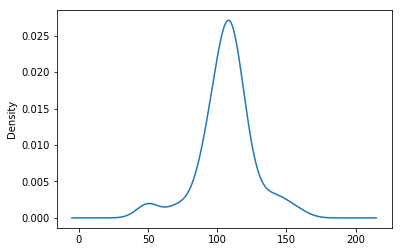

In [25]:
cereal.calories.plot(kind='kde')

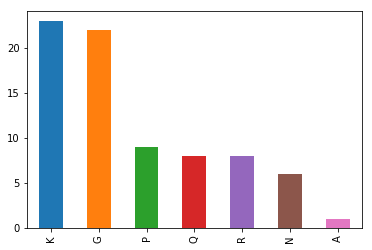

In [26]:
s = cereal.mfr.value_counts()
s.plot(kind='bar')

#### Plotting on DataFrame

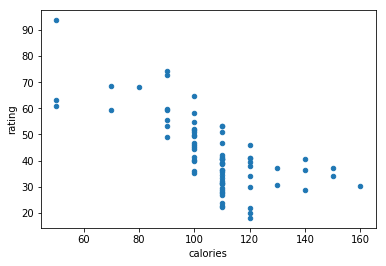

In [27]:
cereal.plot(x='calories', y='rating', kind='scatter')

#### Exercise

1. Using a scatter plot, plot the relationship between sugars and calories.

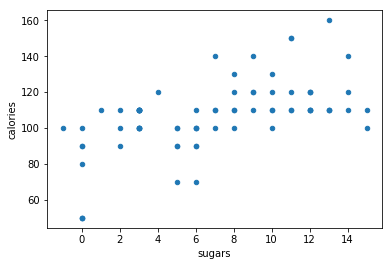

In [21]:
cereal.plot(x='sugars', y='calories', kind='scatter')

### Indexing

In [28]:
c = cereal.head()
c

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [29]:
cereal.loc[2:3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [30]:
c = cereal.set_index('mfr').head()
c

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
N,100% Bran,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
Q,100% Natural Bran,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
K,All-Bran,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
K,All-Bran with Extra Fiber,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
R,Almond Delight,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [31]:
c.loc['K']

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
K,All-Bran,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
K,All-Bran with Extra Fiber,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [32]:
c = cereal.set_index(['mfr','calories'])
#c = c.sort_values(['mfr','calories'])
c.head()

name type  protein  fat  sodium  fiber  \
mfr calories                                                                
N   70                        100% Bran    C        4    1     130   10.0   
Q   120               100% Natural Bran    C        3    5      15    2.0   
K   70                         All-Bran    C        4    1     260    9.0   
    50        All-Bran with Extra Fiber    C        4    0     140   14.0   
R   110                  Almond Delight    C        2    2     200    1.0   

              carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
mfr calories                                                                   
N   70          5.0       6     280        25      3     1.0  0.33  68.402973  
Q   120         8.0       8     135         0      3     1.0  1.00  33.983679  
K   70          7.0       5     320        25      3     1.0  0.33  59.425505  
    50          8.0       0     330        25      3     1.0  0.50  93.704912  
R   110        14.0       8      -1        25      3     1.0  0.75  34.384843

In [33]:
c.loc[('N',90)]

C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


name type  protein  fat  sodium  fiber  \
mfr calories                                                                
N   90           Shredded Wheat 'n'Bran    C        3    0       0    4.0   
    90        Shredded Wheat spoon size    C        3    0       0    3.0   
    90          Strawberry Fruit Wheats    C        2    0      15    3.0   

              carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
mfr calories                                                                   
N   90         19.0       0     140         0      1     1.0  0.67  74.472949  
    90         20.0       0     120         0      1     1.0  0.67  72.801787  
    90         15.0       5      90        25      2     1.0  1.00  59.363993

You may want to reset index. We can use .reset_index() method

In [34]:
c.reset_index().head()

,mfr,calories,name,type,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,70,100% Bran,C,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Q,120,100% Natural Bran,C,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,K,70,All-Bran,C,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,K,50,All-Bran with Extra Fiber,C,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,R,110,Almond Delight,C,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [35]:
c.reset_index('calories').head()

,calories,name,type,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
N,70,100% Bran,C,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
Q,120,100% Natural Bran,C,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
K,70,All-Bran,C,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
K,50,All-Bran with Extra Fiber,C,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
R,110,Almond Delight,C,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### Group By: split-apply-combine

Get a "group" of information, and aggregate it or modify it.

In [36]:
cereal.groupby(['mfr','type'])

In [37]:
cereal.groupby(['mfr','type']).size()

mfr  type
A    H        1
G    C       22
K    C       23
N    C        5
     H        1
P    C        9
Q    C        7
     H        1
R    C        8
dtype: int64

In [38]:
cereal.groupby(['mfr','type']).calories.mean()

mfr  type
A    H       100.000000
G    C       111.363636
K    C       108.695652
N    C        84.000000
     H       100.000000
P    C       108.888889
Q    C        94.285714
     H       100.000000
R    C       115.000000
Name: calories, dtype: float64

In [39]:
cereal.groupby(['mfr','type']).calories.max()

mfr  type
A    H       100
G    C       140
K    C       160
N    C        90
     H       100
P    C       120
Q    C       120
     H       100
R    C       150
Name: calories, dtype: int64

In [40]:
cereal.groupby(['mfr','type']).calories.describe()

count        mean        std    min    25%    50%    75%    max
mfr type                                                                 
A   H       1.0  100.000000        NaN  100.0  100.0  100.0  100.0  100.0
G   C      22.0  111.363636  10.371873  100.0  110.0  110.0  110.0  140.0
K   C      23.0  108.695652  22.218818   50.0  100.0  110.0  115.0  160.0
N   C       5.0   84.000000   8.944272   70.0   80.0   90.0   90.0   90.0
    H       1.0  100.000000        NaN  100.0  100.0  100.0  100.0  100.0
P   C       9.0  108.888889  10.540926   90.0  100.0  110.0  120.0  120.0
Q   C       7.0   94.285714  31.547394   50.0   75.0  100.0  120.0  120.0
    H       1.0  100.000000        NaN  100.0  100.0  100.0  100.0  100.0
R   C       8.0  115.000000  22.677868   90.0  100.0  110.0  120.0  150.0

You can groupby a series that isn't even in a table.

In [41]:
cereal.groupby(cereal.calories // 100 * 100).calories.count()

calories
0      13
100    64
Name: calories, dtype: int64

In [26]:
c = cereal.groupby('mfr').calories.apply(lambda x: x-x.mean())
c.head()

0   -16.666667
1    25.000000
2   -38.695652
3   -58.695652
4    -5.000000
Name: calories, dtype: float64

In [28]:
c = cereal.groupby(['mfr', cereal.calories // 100 * 100]).calories.count()
c

mfr  calories
A    100          1
G    100         22
K    0            4
     100         19
N    0            5
     100          1
P    0            1
     100          8
Q    0            2
     100          6
R    0            1
     100          7
Name: calories, dtype: int64

Look into the following methods (usually used on groupby objects):
- .apply()
- .agg()
- .transform()

Time series methods (usually used on groupby objects):
- .rolling()
- .shift()
- .ffill()
- .bfill()

### Joining DataFrames

In [43]:
sales = pd.DataFrame({'mfr':['A','G','K','N','P','Q','R'],'sales':[20,500,600,40,70,80,70]})
sales

,mfr,sales
0,A,20
1,G,500
2,K,600
3,N,40
4,P,70
5,Q,80
6,R,70


In [44]:
cereal.merge(sales).tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sales
72,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,25,3,1.00,0.25,53.371007,70
73,Great Grains Pecan,P,C,120,3,3,75,3.0,13.0,4,100,25,3,1.00,0.33,45.811716,70
74,Honey-comb,P,C,110,1,0,180,0.0,14.0,11,35,25,1,1.00,1.33,28.742414,70
75,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,70
76,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917,20


In [45]:
cereal.merge(sales, on='mfr').tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sales
72,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,25,3,1.00,0.25,53.371007,70
73,Great Grains Pecan,P,C,120,3,3,75,3.0,13.0,4,100,25,3,1.00,0.33,45.811716,70
74,Honey-comb,P,C,110,1,0,180,0.0,14.0,11,35,25,1,1.00,1.33,28.742414,70
75,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,70
76,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917,20


### Exercise

Merge cereal with sales dataframe (defined below)

In [46]:
np.random.seed(0)
sales = pd.DataFrame({'mfr':['A','G','K','N','P','Q','R']*2,'type':['C','H']*7,'temp':np.random.randint(10, size=14)})
sales

,mfr,type,temp
0,A,C,5
1,G,H,0
2,K,C,3
3,N,H,3
4,P,C,7
5,Q,H,9
6,R,C,3
7,A,H,5
8,G,C,2
9,K,H,4


In [47]:
cereal.merge(sales).tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,temp
72,Honey-comb,P,C,110,1,0,180,0.0,14.0,11,35,25,1,1.00,1.33,28.742414,7
73,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,7
74,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816,3
75,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00,54.850917,5
76,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392,9


### Advanced Pandas

In [48]:
c.unstack(0)

mfr,A,G,K,N,P,Q,R
calories,,,,,,,
0,NaN,NaN,4.0,5.0,1.0,2.0,1.0
100,1.0,22.0,19.0,1.0,8.0,6.0,7.0


In [49]:
c.unstack(0).fillna(0)

mfr,A,G,K,N,P,Q,R
calories,,,,,,,
0,0.0,0.0,4.0,5.0,1.0,2.0,1.0
100,1.0,22.0,19.0,1.0,8.0,6.0,7.0


In [50]:
u = c.unstack(1)
u

calories,0,100
mfr,,
A,NaN,1.0
G,NaN,22.0
K,4.0,19.0
N,5.0,1.0
P,1.0,8.0
Q,2.0,6.0
R,1.0,7.0


In [51]:
u[0] - u[100]

mfr
A     NaN
G     NaN
K   -15.0
N     4.0
P    -7.0
Q    -4.0
R    -6.0
dtype: float64